In [1]:
### Data Analysis
# This file will create a shareable analysis and visualisation of the credit card fraud data.
# Most of this section was taken from the SE Specialization presentation done by my colleague 
# Feng Lu 
# [https://github.com/lufeng76/python/tree/master/credit-card-fraud](https://github.com/lufeng76/python/tree/master/credit-card-fraud)

import numpy as np
import pandas as pd
from pandas import DataFrame

from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
## Load data
data = pd.read_pickle("resources/credit_card_dataframe_final.pkl",compression="gzip")

### Describe the data
# * the name of each column
# * the number of values in each column
# * the number of missing/NaN values in each column; 
# * the contents of the first 5 rows
# * the contents of the last 5 rows
# * the basic stats of each column
data.columns.values
data.info()
data.isnull().sum()
data.head()
data.tail()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854421 entries, 0 to 854420
Data columns (total 33 columns):
Day       854421 non-null int64
Hour      854421 non-null int64
Time      854421 non-null object
V1        854421 non-null float64
V2        854421 non-null float64
V3        854421 non-null float64
V4        854421 non-null float64
V5        854421 non-null float64
V6        854421 non-null float64
V7        854421 non-null float64
V8        854421 non-null float64
V9        854421 non-null float64
V10       854421 non-null float64
V11       854421 non-null float64
V12       854421 non-null float64
V13       854421 non-null float64
V14       854421 non-null float64
V15       854421 non-null float64
V16       854421 non-null float64
V17       854421 non-null float64
V18       854421 non-null float64
V19       854421 non-null float64
V20       854421 non-null float64
V21       854421 non-null float64
V22       854421 non-null float64
V23       854421 non-null float64
V24       

,count,mean,std,min,25%,50%,75%,max
Day,854421.0,2.491635e+00,1.707806,0.000000,1.000000,2.000000,4.000000,5.000000
Hour,854421.0,1.404647e+01,5.835848,0.000000,10.000000,15.000000,19.000000,23.000000
V1,854421.0,1.201481e-15,2.013950,-61.970666,-0.943780,0.018489,1.369722,2.697046
V2,854421.0,3.427553e-16,1.681611,-76.073579,-0.609188,0.066808,0.817581,23.076306
V3,854421.0,-1.338821e-15,1.495246,-49.343395,-0.876124,0.177209,1.011490,9.580169
V4,854421.0,2.184133e-15,1.485488,-6.163196,-0.890438,-0.020848,0.778330,18.300707
V5,854421.0,9.617372e-16,1.367209,-117.120700,-0.683927,-0.053817,0.605384,35.835036
V6,854421.0,1.440078e-15,1.292691,-26.160506,-0.743543,-0.265613,0.385996,73.301626
V7,854421.0,-5.336923e-16,1.174562,-43.557242,-0.524837,0.038016,0.540415,120.589494
V8,854421.0,1.164250e-16,1.160949,-73.216718,-0.202446,0.021683,0.317721,20.007208


In [3]:
## Check correlation among variables
# The correlation plot is not really important here 
# as the input data is already gone through a PCA tranformation
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 1]


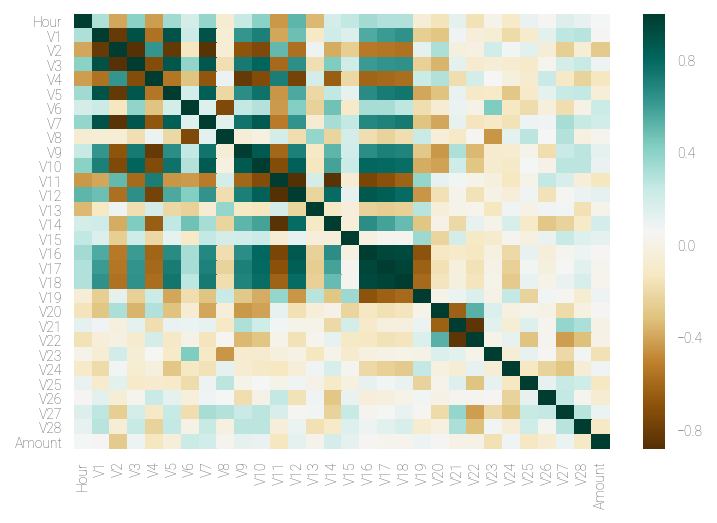

In [4]:
corr_fraud = fraud.loc[:, ~fraud.columns.isin(['Class','Day'])].corr()
sns.heatmap(corr_fraud,cmap="BrBG",annot=False)


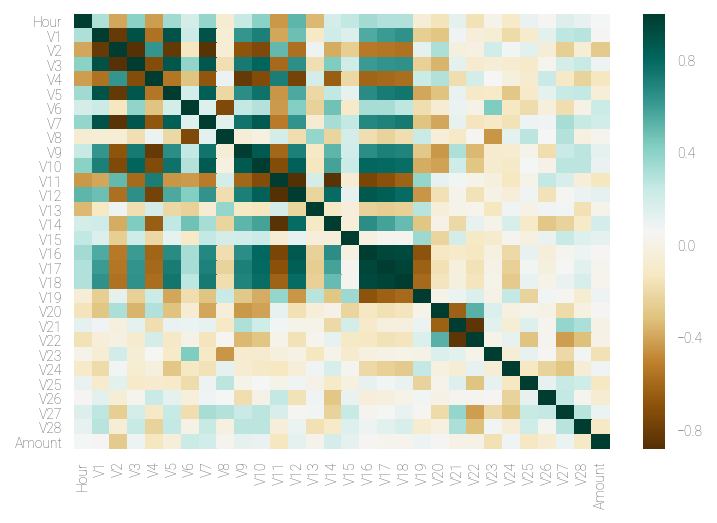

In [5]:
corr_normal = normal.loc[:, ~fraud.columns.isin(['Class','Day'])].corr()
sns.heatmap(corr_normal,cmap="BrBG",annot=False)


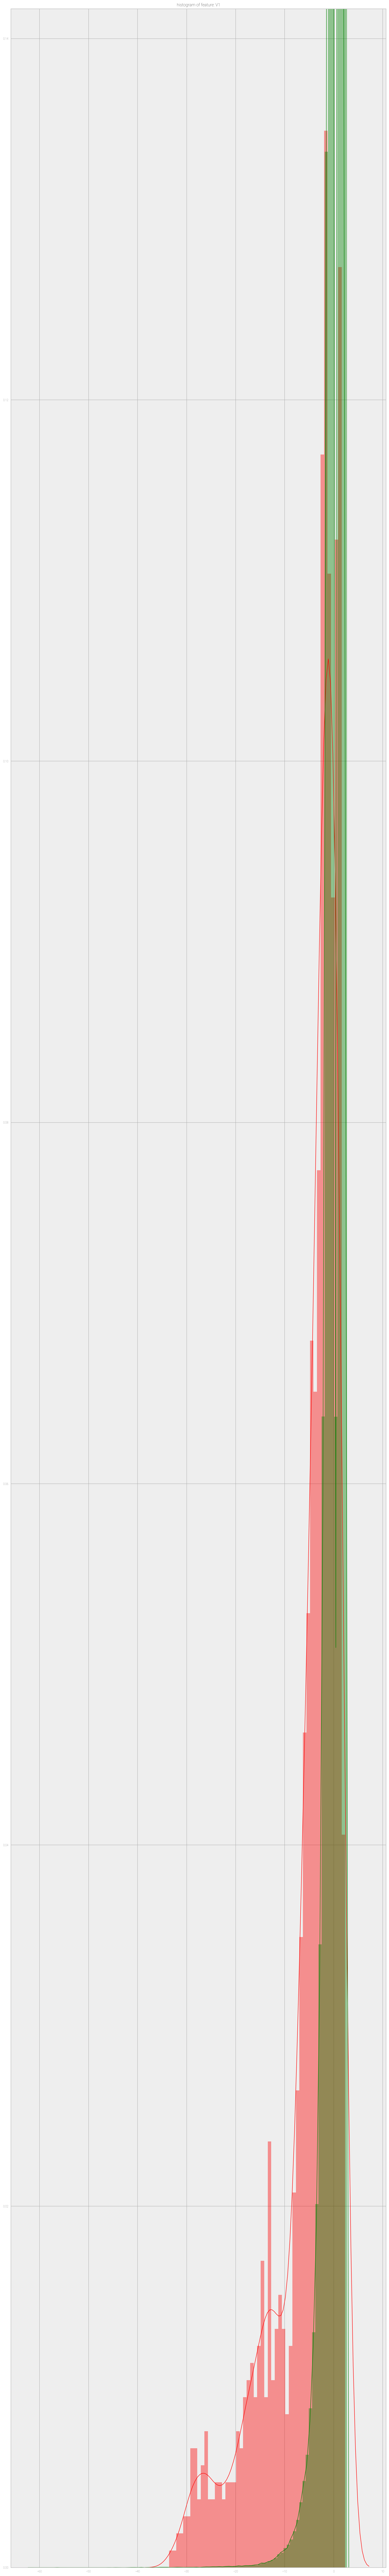

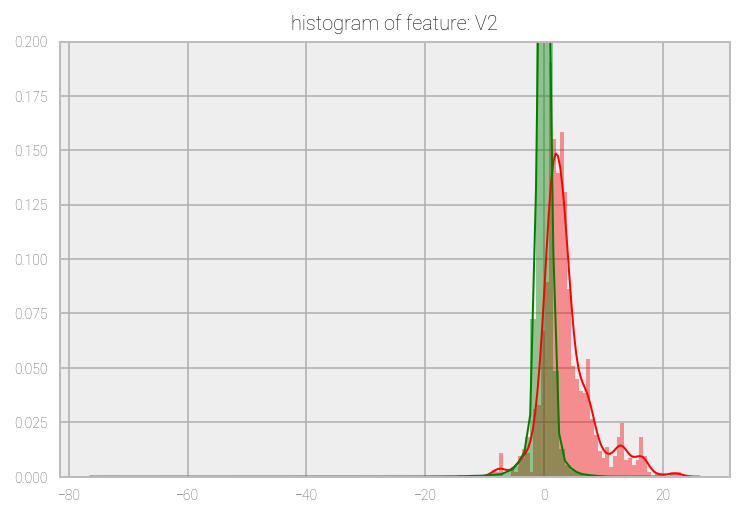

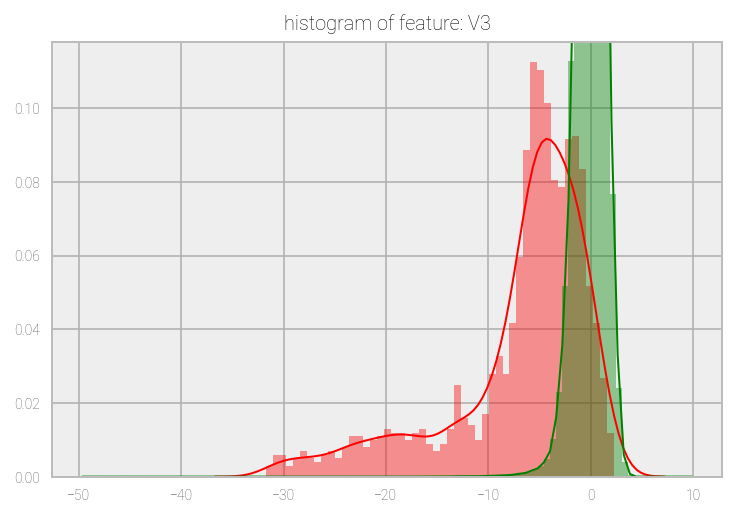

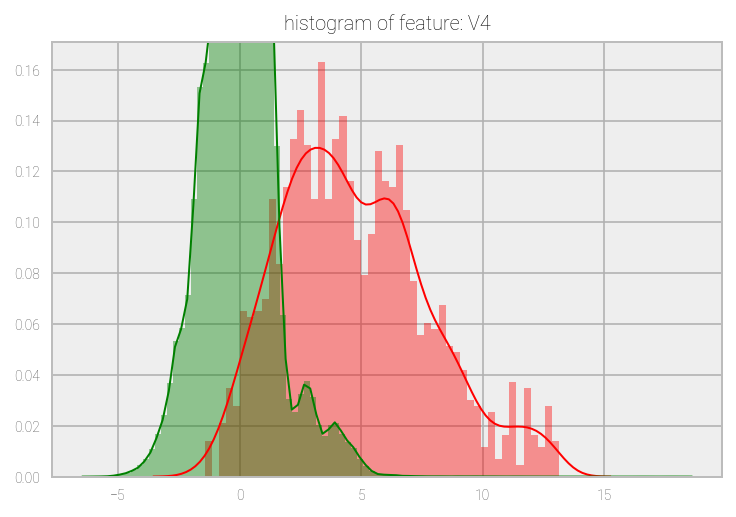

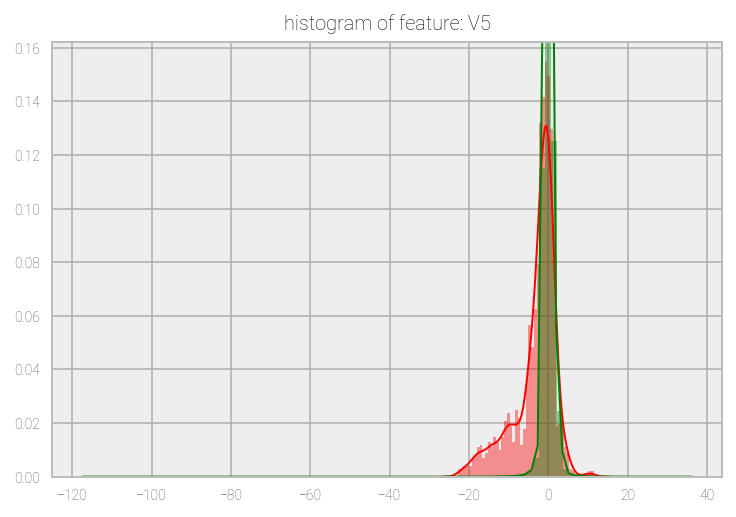

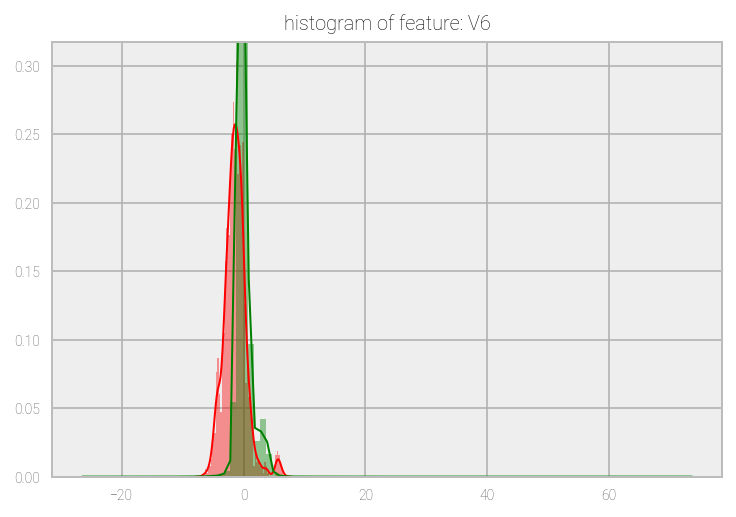

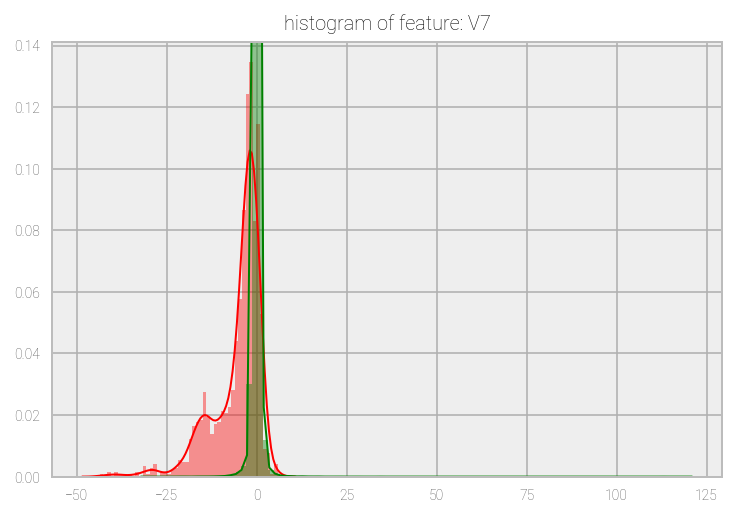

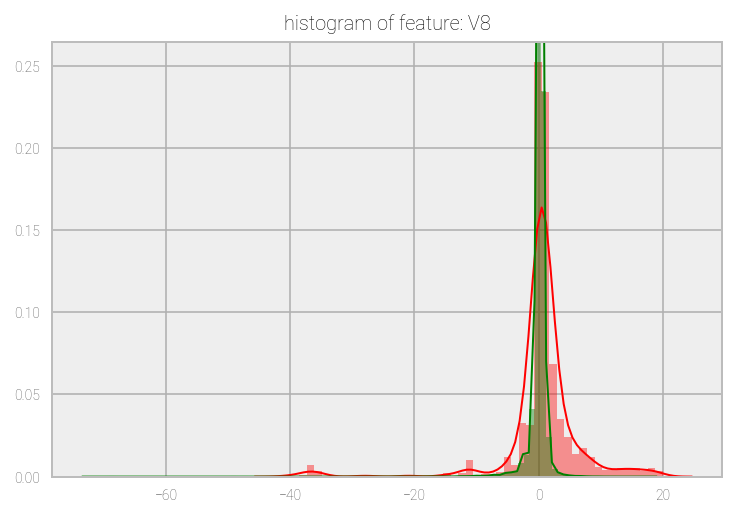

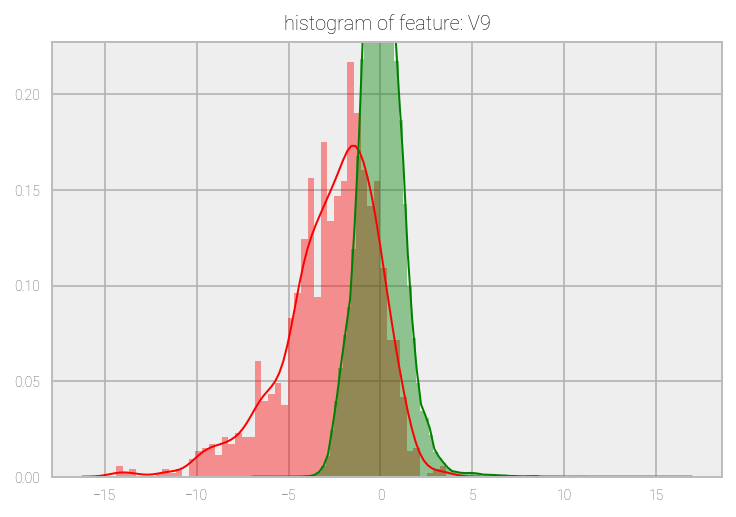

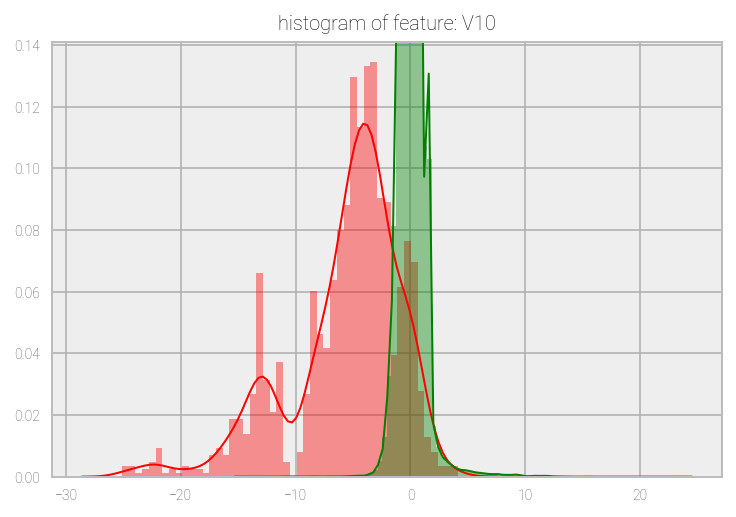

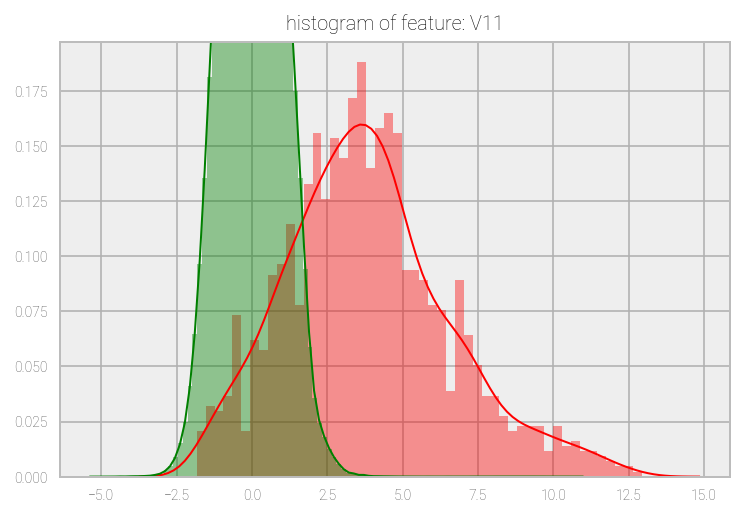

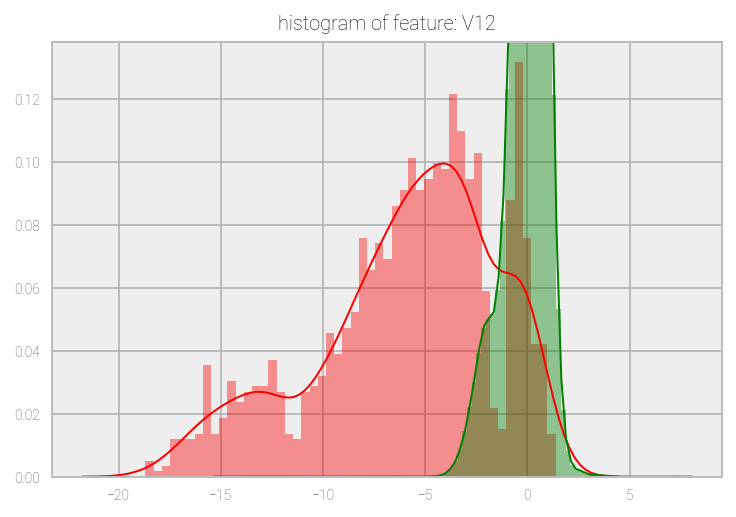

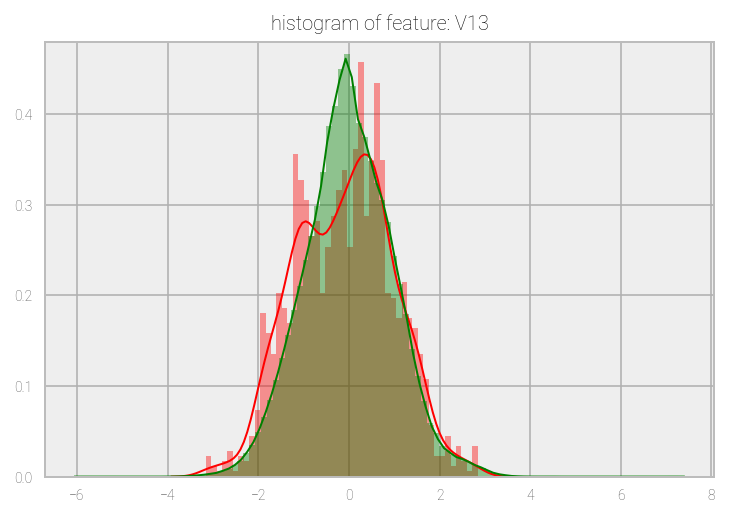

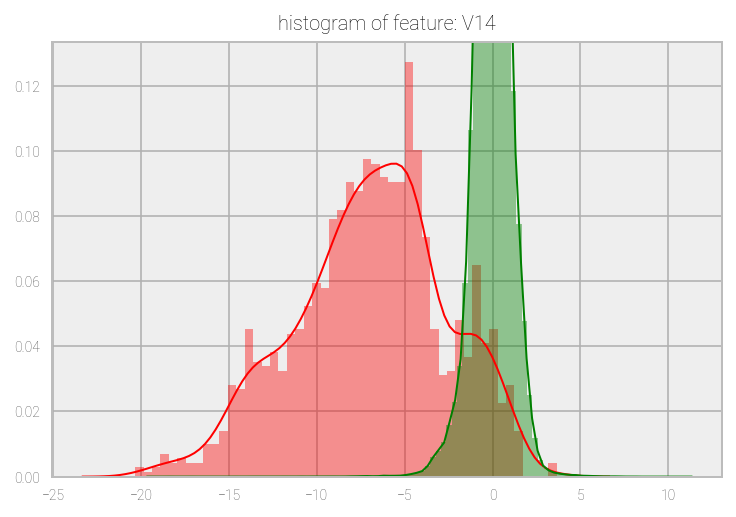

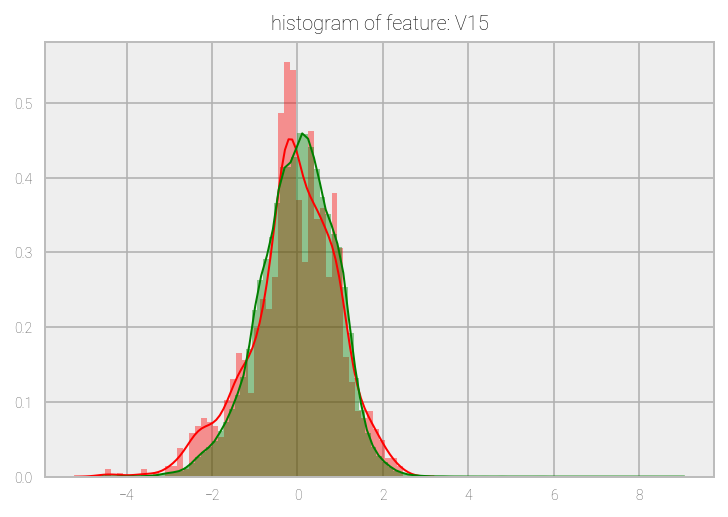

In [ ]:
## Distplot for V1 and V28
# What we observe here is that the distribution for varibles 
# V8,V13,V15,V20,V22,V23,V25,V26,V27,V28 have no significant influence 
# between fraud and normal data set.
# We can consider removing these variables during the feature selection phase
features = data.iloc[:,3:29].columns
plt.figure(figsize=(16,28*4))
for i, cn in enumerate(data[features]):
    ax = plt.subplot()
    sns.distplot(data[cn][data["Class"] == 1], bins=50, color='r')
    sns.distplot(data[cn][data["Class"] == 0], bins=100, color='g')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
    plt.show()